## Definindo os Ambientes

In [2]:
## caged_brach
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import geopandas as gpd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 1999
pd.options.display.max_colwidth = 200


import basedosdados as bd
import requests

from pathlib import Path
from copy import deepcopy

from geobr import read_municipality

from dataclasses import dataclass

In [5]:
import requests
url= 'https://staging.basedosdados.org/api/3/action/organization_list'
response = requests.get(url).json()["result"]
organizations = response


In [44]:
dataset = {'id': 'ececc453-fd2c-4273-87d0-ad5ee22974c2', 'name': 'test2', 'title': None, 'type': 'dataset', 'notes': None, 'author': None, 'author_email': None, 'maintainer': None, 'maintainer_email': None, 'state': 'active', 'license_id': None, 'url': None, 'version': None, 'metadata_created': '2022-02-11T21:11:58.946092', 'metadata_modified': '2022-02-11T22:43:32.611576', 'creator_user_id': 'd5d0a444-ec58-4720-a23f-0345a0bec429', 'private': False, 'license_title': None, 'num_resources': 1, 'resources': [{'id': 'b37fc8ea-22a4-425b-a677-bc07fa4f13a2', 'name': 'yeah3iC', 'description': None, 'position': 0, 'url': '', 'cache_last_updated': None, 'cache_url': None, 'created': '2022-02-11T21:12:09.409101', 'format': '', 'hash': '', 'last_modified': None, 'metadata_modified': '2022-02-11T22:43:32.615538', 'mimetype': None, 'mimetype_inner': None, 'package_id': 'ececc453-fd2c-4273-87d0-ad5ee22974c2', 'size': None, 'state': 'active', 'url_type': None, 'resource_type': 'bdm_table', 'dataset_id': 'test2', 'table_id': 'yeah3iC', 'spatial_coverage': None, 'temporal_coverage': None, 'update_frequency': None, 'last_updated': {'metadata': None, 'data': None, 'release': None}, 'version': None, 'published_by': {'name': None, 'email': None, 'github_user': None, 'ckan_user': None, 'website': None}, 'data_cleaned_by': {'name': None, 'email': None, 'github_user': None, 'ckan_user': None, 'website': None}, 'data_cleaning_description': None, 'raw_files_url': None, 'auxiliary_files_url': None, 'architecture_url': None, 'source_bucket_name': 'basedosdados-dev', 'project_id_prod': 'basedosdados-dev', 'project_id_staging': 'basedosdados-dev', 'partitions': None, 'columns': [], 'identifying_columns': None, 'covered_by_dictionary': None, 'bdm_file_size': None, 'time_unit': None, 'entity': None}], 'groups': [], 'owner_org': 'e7c869f1-7de8-48e2-9130-2294a3b2b9d7', 'organization': {'id': 'e7c869f1-7de8-48e2-9130-2294a3b2b9d7', 'name': 'controladoria-geral-da-uniao', 'title': 'Controladoria Geral da União', 'type': 'organization', 'description': 'www.cgu.gov.br', 'image_url': '2021-04-14-212930.8469531560522004082.jpeg', 'created': '2019-09-17T05:06:17.230569', 'is_organization': True, 'approval_status': 'approved', 'state': 'active'}, 'num_tags': 0, 'tags': [], 'relationships_as_object': [], 'relationships_as_subject': [], 'isopen': False, 'extras': [{'key': 'dataset_args', 'value': {'description': None, 'ckan_url': None, 'github_url': None}}]}

In [46]:
response = {}

In [47]:
response["entities"] = {}
entities = []
for resource in dataset["resources"]:
    for ol in resource.get("observation_level", {}):
        if "entity" in ol:
            res_entities = ol.get("entity")
            entities.append(res_entities)
entities = list(set(entities))

for key in entities:
    value = response["entities"].get(key, 0) + 1
    response["entities"][key] = value


In [48]:
entities

[]

In [43]:
p

{'id': 'ececc453-fd2c-4273-87d0-ad5ee22974c2',
 'name': 'test2',
 'title': None,
 'type': 'dataset',
 'notes': None,
 'author': None,
 'author_email': None,
 'maintainer': None,
 'maintainer_email': None,
 'state': 'active',
 'license_id': None,
 'url': None,
 'version': None,
 'metadata_created': '2022-02-11T21:11:58.946092',
 'metadata_modified': '2022-02-11T22:43:32.611576',
 'creator_user_id': 'd5d0a444-ec58-4720-a23f-0345a0bec429',
 'private': False,
 'license_title': None,
 'num_resources': 1,
 'resources': [{'id': 'b37fc8ea-22a4-425b-a677-bc07fa4f13a2',
   'name': 'yeah3iC',
   'description': None,
   'position': 0,
   'url': '',
   'cache_last_updated': None,
   'cache_url': None,
   'created': '2022-02-11T21:12:09.409101',
   'format': '',
   'hash': '',
   'last_modified': None,
   'metadata_modified': '2022-02-11T22:43:32.615538',
   'mimetype': None,
   'mimetype_inner': None,
   'package_id': 'ececc453-fd2c-4273-87d0-ad5ee22974c2',
   'size': None,
   'state': 'active',
  

In [2]:
tb = bd.Table(dataset_id='br_bd_diretorios_brasil', table_id='municipio')

In [15]:
tb.create(
    path='/Users/m/Downloads/data.csv',
    if_table_exists='replace',
    if_storage_data_exists='replace',
    if_table_config_exists='replace',
)

Uploading files: 100%|████████████████████████████| 1/1 [00:00<00:00,  1.06it/s]


In [10]:
tb.publish(if_exists='replace')

In [3]:
tb._make_publish_sql()

/*
Query para publicar a tabela.

Esse é o lugar para:
    - modificar nomes, ordem e tipos de colunas
    - dar join com outras tabelas
    - criar colunas extras (e.g. logs, proporções, etc.)

Qualquer coluna definida aqui deve também existir em `table_config.yaml`.

# Além disso, sinta-se à vontade para alterar alguns nomes obscuros
# para algo um pouco mais explícito.

TIPOS:
    - Para modificar tipos de colunas, basta substituir STRING por outro tipo válido.
    - Exemplo: `SAFE_CAST(column_name AS NUMERIC) column_name`
    - Mais detalhes: https://cloud.google.com/bigquery/docs/reference/standard-sql/data-types
*/

CREATE VIEW basedosdados-dev.br_bd_diretorios_brasil.municipio AS
SELECT 
SAFE_CAST(id_municipio AS STRING) id_municipio,
SAFE_CAST(id_municipio_6 AS STRING) id_municipio_6,
SAFE_CAST(id_municipio_tse AS STRING) id_municipio_tse,
SAFE_CAST(id_municipio_rf AS STRING) id_municipio_rf,
SAFE_CAST(id_municipio_bcb AS STRING) id_municipio_bcb,
SAFE_CAST(nome AS STRING) nome

'/*\nQuery para publicar a tabela.\n\nEsse é o lugar para:\n    - modificar nomes, ordem e tipos de colunas\n    - dar join com outras tabelas\n    - criar colunas extras (e.g. logs, proporções, etc.)\n\nQualquer coluna definida aqui deve também existir em `table_config.yaml`.\n\n# Além disso, sinta-se à vontade para alterar alguns nomes obscuros\n# para algo um pouco mais explícito.\n\nTIPOS:\n    - Para modificar tipos de colunas, basta substituir STRING por outro tipo válido.\n    - Exemplo: `SAFE_CAST(column_name AS NUMERIC) column_name`\n    - Mais detalhes: https://cloud.google.com/bigquery/docs/reference/standard-sql/data-types\n*/\n\nCREATE VIEW basedosdados-dev.br_bd_diretorios_brasil.municipio AS\nSELECT \nSAFE_CAST(id_municipio AS STRING) id_municipio,\nSAFE_CAST(id_municipio_6 AS STRING) id_municipio_6,\nSAFE_CAST(id_municipio_tse AS STRING) id_municipio_tse,\nSAFE_CAST(id_municipio_rf AS STRING) id_municipio_rf,\nSAFE_CAST(id_municipio_bcb AS STRING) id_municipio_bcb,\nSAF

In [11]:
df = pd.read_csv('/Users/m/Downloads/data.csv')

In [12]:
df.head()

,id_municipio,id_municipio_6,id_municipio_tse,id_municipio_rf,id_municipio_bcb,nome,capital_uf,id_comarca,id_regiao_saude,nome_regiao_saude,id_regiao_imediata,nome_regiao_imediata,id_regiao_intermediaria,nome_regiao_intermediaria,id_microrregiao,nome_microrregiao,id_mesorregiao,nome_mesorregiao,ddd,id_uf,sigla_uf,nome_uf,nome_regiao
0,1100015,110001,310,33,43036.0,Alta Floresta D'Oeste,0,1100015,11005,Zona da Mata,110005,Cacoal,1102,Ji-Paraná,11006,Cacoal,1102,Leste Rondoniense,69,11,RO,Rondônia,Norte
1,1100023,110002,78,7,9393.0,Ariquemes,0,1100023,11001,Vale do Jamari,110002,Ariquemes,1101,Porto Velho,11003,Ariquemes,1102,Leste Rondoniense,69,11,RO,Rondônia,Norte
2,1100031,110003,450,37,44626.0,Cabixi,0,1100064,11006,Cone Sul,110006,Vilhena,1102,Ji-Paraná,11008,Colorado do Oeste,1102,Leste Rondoniense,69,11,RO,Rondônia,Norte
3,1100049,110004,94,9,10746.0,Cacoal,0,1100049,11002,Café,110005,Cacoal,1102,Ji-Paraná,11006,Cacoal,1102,Leste Rondoniense,69,11,RO,Rondônia,Norte
4,1100056,110005,272,27,42219.0,Cerejeiras,0,1100056,11006,Cone Sul,110006,Vilhena,1102,Ji-Paraná,11008,Colorado do Oeste,1102,Leste Rondoniense,69,11,RO,Rondônia,Norte


In [6]:
# MY_FILEPATH = '/home/patricia/Documentos/Escritório de dados/teste.csv'
# MY_PROJECT_ID = 'rj-escritorio-dev'

bd.download(
    savepath="/Users/m/Downloads/test.csv", 
    query_project_id="rj-escritorio-dev",
    dataset_id="meio_ambiente_clima", 
    table_id="estacoes_alertario", 
    billing_project_id='rj-escritorio-dev',
)

Downloading: 100%|███████████████████████████| 33/33 [00:00<00:00, 211.55rows/s]


In [7]:
import requests
url= 'https://basedosdados.org/api/3/action/bd_dataset_search?&resource_type=bdm_table'
response = requests.get(url)
json_response = response.json()
datasets = json_response["result"]["datasets"]
print(datasets[3]['name'])

br-me-caged


In [20]:
url = 'http://0.0.0.0:5000/api/3/action/bd_dataset_search?q=agua&entities'
response = response.json()['result']

In [23]:
response.keys()

dict_keys(['count', 'datasets', 'groups', 'groups_display_names', 'tags', 'organizations', 'organizations_display_names', 'entities', 'update_frequencies', 'spatial_coverage_continent', 'spatial_coverage_country', 'spatial_coverage_admin1', 'spatial_coverage_admin2', 'resource_bdm_table_count', 'resource_external_link_count'])

In [11]:
import glob
files = glob.glob("test_data/*")

In [15]:
file = files[0] if files != [] else []

In [2]:
import basedosdados as bd

tb = bd.Table(dataset_id='br_ans', table_id='id_tabela')
# tb.create(
#     path='path_para_os_dados',
#     if_table_exists='replace',
#     if_storage_data_exists='replace',
#     if_table_config_exists='replace',
# )

In [3]:
tb.table_full_name

{'prod': 'rj-escritorio-dev.br_ans.id_tabela',
 'staging': 'rj-escritorio-dev.br_ans_staging.id_tabela',
 'all': {'prod': 'rj-escritorio-dev.br_ans.id_tabela',
  'staging': 'rj-escritorio-dev.br_ans_staging.id_tabela'}}

In [6]:
import basedosdados as bd

tb = bd.Table(dataset_id='blablabla', table_id='blablabla')
tb.table_exists(mode='staging')

False

In [ ]:
tb.table

In [4]:
import os
from uuid import uuid4
import datetime
from pathlib import Path
from typing import Union

import pandas as pd
import numpy as np
import basedosdados as bd

# from p`ipelines.utils import log

def get_data() -> pd.DataFrame:
    """
    Get random data
    """
    URL = 'https://x-math.herokuapp.com/api/random'
    r = requests.get(URL)
    
    cols = ['date','first', 'second', 'operation', 'expression', 'answer']
    ds = datetime.datetime.now().strftime('%Y-%m-%d %H:%M')
    try: 
        df = pd.json_normalize(r.json())
        df['date'] = ds
    except:
        data = [datetime.datetime.now(),np.nan,np.nan,np.nan,np.nan,np.nan]
        df = pd.DataFrame(data, columns=cols)
    return df[cols]


def dataframe_to_csv(df: pd.DataFrame, path: Union[str, Path]) -> Union[str, Path]:
    """
    Writes a dataframe to a CSV file.
    """
    # Remove filename from path
    path = Path(path)
    # Create directory if it doesn't exist
    os.makedirs(path, exist_ok=True)
    # Write dataframe to CSV
    # log(f"Writing dataframe to CSV: {path}")
    ds = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M')
    df.to_csv(path / f"{ds}.csv", index=False)
    # log(f"Wrote dataframe to CSV: {path}")
    
    return path
    

def upload_to_gcs(path: Union[str, Path], dataset_id: str, table_id: str) -> None:
    """
    Uploads a bunch of CSVs using BD+
    """
    tb = bd.Table(dataset_id=dataset_id, table_id=table_id)
    st = bd.Storage(dataset_id=dataset_id, table_id=table_id)

    if tb.table_exists(mode="staging"):
        # Delete old data
        # st.delete_table(
        #     mode="staging", bucket_name=st.bucket_name, not_found_ok=True)
        # log(
        #     f"Successfully deleted OLD DATA {st.bucket_name}.staging.{dataset_id}.{table_id}"
        # )

        # the name of the files need to be the same or the data doesn't get overwritten
        tb.append(
            filepath=path,
            if_exists="replace",
        )

#         log(
#             f"Successfully uploaded {path} to {tb.bucket_name}.staging.{dataset_id}.{table_id}"
#         )

    else:
        log(
            "Table does not exist in STAGING, need to create it in local first.\nCreate and publish the table in BigQuery first."
        )

In [5]:
path = f"data/{uuid4()}/"

df = get_data()
path = dataframe_to_csv(df, path)
upload_to_gcs(path=path,dataset_id='test_dataset', table_id='test_prefect')

Uploading files: 100%|████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.21it/s]


In [6]:
tb = bd.Table(dataset_id='test_dataset', table_id='test_prefect_sq')

In [7]:
tb.create(path=path)

Uploading files: 100%|████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.35it/s]


In [19]:
query = """
SELECT
  
  t2.id_municipio,
  t2.nome, 
  t2.sigla_uf,
  t2.nome_uf,
  t1.populacao,
FROM `basedosdados.br_ibge_populacao.municipio` t1
JOIN `basedosdados.br_bd_diretorios_brasil.municipio` t2
  ON t1.id_municipio=t2.id_municipio 
WHERE t1.ano=2020
"""

df = bd.read_sql(query, billing_project_id='rj-escritorio-dev')

Downloading: 100%|██████████████████████| 5570/5570 [00:00<00:00, 7803.73rows/s]


In [7]:
gdf = read_municipality(    code_muni='all',year=2020,)

In [34]:
dd = gdf.copy()
dd['id_municipio'] = dd['code_muni'].astype(int).astype(str)

In [38]:
df_final = df.merge(dd[['id_municipio','geometry']], how='outer', on="id_municipio")
df_final.insert(5,'populacao_percentual_br',100*df_final['populacao']/df_final['populacao'].sum())

df_final = gpd.GeoDataFrame(df_final)
df_final["lat"] = df_final.centroid.map(lambda p: p.y)
df_final["lon"] = df_final.centroid.map(lambda p: p.x)



In [46]:
populacao_estados = df_final.groupby('sigla_uf')['populacao'].transform('sum')
df_final.insert(6,'populacao_percentual_uf',100*df_final['populacao']/populacao_estados)


In [49]:
df_final.to_csv('/Users/m/Downloads/pop_dist.csv', index=False)

In [43]:
import os
import re
import unidecode
from ftplib import FTP
from datetime import datetime

import py7zr
import shutil
import numpy as np
import pandas as pd
import basedosdados as bd

today = datetime.strftime(datetime.today(), "%Y-%m-%d")

In [44]:
md = bd.Metadata(dataset_id = 'mundo_bm_learning_poverty', table_id='pais')


In [1]:
from geobr import read_municipality
rio = read_municipality(code_muni=3304557, year=2020)

/Users/m/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
rio.to_file('/Users/m/Downloads/rj_geometry.geojson', driver='GeoJSON')

<AxesSubplot:>

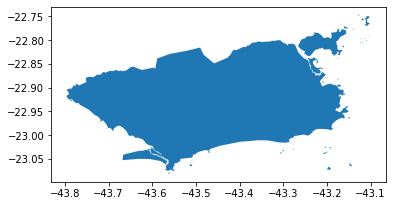

In [3]:
rio.plot()

In [65]:
tb = bd.Table(dataset_id = 'seconserva_buracos', table_id='logradouros_prefeitura')



In [78]:
st = bd.Storage(dataset_id = 'seconserva_buracos', table_id='logradouros_prefeitura')

In [80]:
st.delete_table()

Delete Table Chunk:   0%|                                 | 0/1 [00:00<?, ?it/s]

Delete Table Chunk 0 | Attempt 0: delete operation starts again in 5 seconds...


Delete Table Chunk:   0%|                                 | 0/1 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [67]:
df = pd.read_csv('/Users/m/Downloads/base_logradouros_tratada.csv')

In [72]:
df.head().to_csv('/Users/m/Downloads/base_logradouros_tratada_test.csv', index=False)

In [76]:
tb.create("/Users/m/Downloads/base_logradouros_tratada_test.csv",
          force_dataset=True,
        if_table_exists="replace",
        if_storage_data_exists="replace",
        if_table_config_exists="replace")

Uploading files: 100%|████████████████████████████| 1/1 [00:01<00:00,  1.29s/it]


In [ ]:
basedosdados metadata create br_ibge_pnadc microdados --if_exists replace

In [58]:
md = bd.Metadata(dataset_id='br_ibge_pnadc', table_id='microdados')

In [59]:
md.create(if_exists='replace', )

In [37]:
md.create(if_exists='replace')

None


AttributeError: 'NoneType' object has no attribute 'get'

In [24]:
data = {'id': '4d298902-3d03-44be-b80d-7179336620c1', 'name': 'microdados', 'description': 'Microdados da PNAD Contínua.', 'position': 2, 'url': '', 'cache_last_updated': None, 'cache_url': None, 'created': '2021-04-01T23:26:34.228071', 'datastore_active': False, 'format': '', 'hash': '', 'last_modified': None, 'metadata_modified': '2021-12-15T12:18:07.596489', 'mimetype': None, 'mimetype_inner': None, 'package_id': '90ec5b8b-ad2e-4f90-bdd8-e16e5f95052e', 'size': None, 'state': 'active', 'url_type': None, 'resource_type': 'bdm_table', 'dataset_id': 'br_ibge_pnadc', 'table_id': 'microdados', 'spatial_coverage': {'continent': ['south_america'], 'country': ['bra'], 'admin1': None, 'admin2': None}, 'temporal_coverage': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], 'update_frequency': 'quarter', 'entity': ['person'], 'time_unit': None, 'identifying_columns': [], 'last_updated': None, 'version': 'v1.0', 'published_by': {'name': 'Ricardo Dahis', 'email': 'rdahis@basedosdados.org', 'github_user': '', 'website': 'www.ricardodahis.com', 'ckan_user': ''}, 'data_cleaned_by': {'name': None, 'email': None, 'github_user': '', 'ckan_user': '', 'website': '', 'code_url': None}, 'data_cleaning_description': '- Tratamento e compatibilização feitos pelo pacote "PNADcIBGE" no R (disponibilizado pelo IBGE).\n', 'raw_files_url': None, 'auxiliary_files_url': 'https://storage.googleapis.com/basedosdados/auxiliary_files/br_ibge_pnadc.zip', 'architecture_url': None, 'covered_by_dictionary': None, 'source_bucket_name': 'basedosdados-dev', 'project_id_prod': 'basedosdados-dev', 'project_id_staging': 'basedosdados-dev', 'partitions': 'ano, trimestre, sigla_uf', 'bdm_file_size': None, 'columns': [{'name': 'id_uf', 'bigquery_type': None, 'description': 'ID Unidade da Federação', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'capital', 'bigquery_type': None, 'description': 'Município da Capital', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'rm_ride', 'bigquery_type': None, 'description': 'Região Metropolitana e Região Administrativa Integrada', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'id_upa', 'bigquery_type': None, 'description': 'ID Unidade Primária de Amostragem (UPA)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'id_estrato', 'bigquery_type': None, 'description': 'ID Estrato (As 2 primeiras posições representam o código da Unidade da Federação)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v1008', 'bigquery_type': None, 'description': 'Número de seleção do domicílio', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v1014', 'bigquery_type': None, 'description': 'Painel', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v1016', 'bigquery_type': None, 'description': 'Número da entrevista no domicílio', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v1022', 'bigquery_type': None, 'description': 'Situação do domicílio', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v1023', 'bigquery_type': None, 'description': 'Tipo de área', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v1027', 'bigquery_type': None, 'description': 'Peso do domicílio e das pessoas (Peso trimestral com correção de não entrevista sem pós estratificação pela projeção de população)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v1028', 'bigquery_type': None, 'description': 'Peso do domicílio e das pessoas (Peso trimestral com correção de não entrevista com pós estratificação pela projeção de população)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v1029', 'bigquery_type': None, 'description': 'Projeção da população', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'posest', 'bigquery_type': None, 'description': 'Domínios de projeção (As 2 primeiras posições representam o código da Unidade da Federação e a última, o tipo de área. UF(2) + V1023(1))', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v2001', 'bigquery_type': None, 'description': 'Número de pessoas no domicílio', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v2003', 'bigquery_type': None, 'description': 'Número de ordem', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v2005', 'bigquery_type': None, 'description': 'Condição no domicílio', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v2007', 'bigquery_type': None, 'description': 'Sexo', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v2008', 'bigquery_type': None, 'description': 'Dia de nascimento', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v20081', 'bigquery_type': None, 'description': 'Mês de nascimento', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v20082', 'bigquery_type': None, 'description': 'Ano de nascimento', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v2009', 'bigquery_type': None, 'description': 'Idade do morador na data de referência', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v2010', 'bigquery_type': None, 'description': 'Cor ou raça', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3001', 'bigquery_type': None, 'description': '... sabe ler e escrever?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3002', 'bigquery_type': None, 'description': '... frequenta escola?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3002a', 'bigquery_type': None, 'description': 'A escola que ... frequenta é de', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3003', 'bigquery_type': None, 'description': 'Qual é o curso que ... frequenta?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3003a', 'bigquery_type': None, 'description': 'Qual é o curso que ... frequenta?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3004', 'bigquery_type': None, 'description': 'A duração deste curso que ... frequenta é de', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3005', 'bigquery_type': None, 'description': 'Este curso que ... frequenta é seriado?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3005a', 'bigquery_type': None, 'description': 'Esse curso que .... frequenta é organizado em', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3006', 'bigquery_type': None, 'description': 'Qual é o ano/série/semestre que ... frequenta?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3006a', 'bigquery_type': None, 'description': 'Qual é a etapa do ensino fundamental que ... frequenta?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3007', 'bigquery_type': None, 'description': '... já concluiu algum outro curso de graduação?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3008', 'bigquery_type': None, 'description': 'Anteriormente ... frequentou escola?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3009', 'bigquery_type': None, 'description': 'Qual foi o curso mais elevado que ... frequentou anteriormente?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3009a', 'bigquery_type': None, 'description': 'Qual foi o curso mais elevado que ... frequentou anteriormente?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3010', 'bigquery_type': None, 'description': 'A duração deste curso que ... frequentou anteriormente era de', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3011', 'bigquery_type': None, 'description': 'Este curso que ... frequentou anteriormente era seriado?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3011a', 'bigquery_type': None, 'description': 'Esse curso que .... frequentou era organizado em', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3012', 'bigquery_type': None, 'description': '... Concluiu com aprovação, pelo menos a primeira série deste curso que frequentou anteriormente?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3013', 'bigquery_type': None, 'description': 'Qual foi o último ano/série/semestre que ... concluiu com aprovação, neste curso que frequentou anteriormente?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3013a', 'bigquery_type': None, 'description': 'Qual foi a etapa de ensino fundamental que ... frequentou?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3013b', 'bigquery_type': None, 'description': '... Concluiu os anos iniciais deste curso que frequentou anteriormente?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v3014', 'bigquery_type': None, 'description': '... Concluiu este curso que frequentou anteriormente?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4001', 'bigquery_type': None, 'description': 'Na semana de ... a ... (semana de referência), ... trabalhou ou estagiou, durante pelo menos 1 hora, em alguma atividade remunerada em dinheiro?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4002', 'bigquery_type': None, 'description': 'Na semana de ... a ... (semana de referência), ... trabalhou ou estagiou, durante pelo menos 1 hora, em alguma atividade remunerada em produtos, mercadorias, moradia, alimentação, etc.?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4003', 'bigquery_type': None, 'description': 'Na semana de ... a ... (semana de referência), ... fez algum bico ou trabalhou em alguma atividade ocasional remunerada durante pelo menos 1 hora?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4004', 'bigquery_type': None, 'description': 'Na semana de ... a ... (semana de referência), ... ajudou durante pelo menos 1 hora, sem receber pagamento, no trabalho remunerado de algum morador do domicílio ou de parente?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4005', 'bigquery_type': None, 'description': 'Na semana de ... a ... (semana de referência), ... tinha algum trabalho remunerado do qual estava temporariamente afastado?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4006', 'bigquery_type': None, 'description': 'Na semana de ... a .... (semana de referência), por que motivo ... estava afastado desse trabalho?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4006a', 'bigquery_type': None, 'description': 'Na semana de ... a .... (semana de referência), por que motivo ... estava afastado desse trabalho?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4007', 'bigquery_type': None, 'description': 'Durante o tempo de afastamento, ... continuou a receber ao menos uma parte do pagamento?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4008', 'bigquery_type': None, 'description': 'Em .../.../...(último dia da semana de referência), fazia quanto tempo que ... estava afastado desse trabalho?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40081', 'bigquery_type': None, 'description': 'Tempo que estava afastado (De 1 mês a menos de 1 ano)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40082', 'bigquery_type': None, 'description': 'Tempo que estava afastado (De 1 ano a menos de 2 anos)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40083', 'bigquery_type': None, 'description': 'Tempo que estava afastado (de 02 anos a 98 anos)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4009', 'bigquery_type': None, 'description': 'Quantos trabalhos ... tinha na semana de ... a ... (semana de referência?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4010', 'bigquery_type': None, 'description': 'Código da ocupação (cargo ou função)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4012', 'bigquery_type': None, 'description': 'Nesse trabalho, ... era', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40121', 'bigquery_type': None, 'description': 'Trabalhador não remunerado', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4013', 'bigquery_type': None, 'description': 'Código da principal atividade desse negócio/empresa', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40132', 'bigquery_type': None, 'description': 'Qual a seção da atividade?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40132a', 'bigquery_type': None, 'description': 'Qual a seção da atividade?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4014', 'bigquery_type': None, 'description': 'Esse trabalho era na área', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4015', 'bigquery_type': None, 'description': 'Na semana de ... a ... (semana de referência), ... teve ajuda, nesse trabalho, de pelo menos um trabalhador não remunerado que era membro do domicílio ou parente?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40151', 'bigquery_type': None, 'description': 'Quantos trabalhadores não remunerados?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v401511', 'bigquery_type': None, 'description': '1 a 5 trabalhadores não remunerados', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v401512', 'bigquery_type': None, 'description': '6 a 10 trabalhadores não remunerados', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4016', 'bigquery_type': None, 'description': 'Na semana de ... a ... (semana de referência), quantos empregados trabalhavam nesse negócio/empresa que ... tinha?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40161', 'bigquery_type': None, 'description': '1 a 5 empregados', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40162', 'bigquery_type': None, 'description': '6 a 10 empregados', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40163', 'bigquery_type': None, 'description': '11 a 50 empregados', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4017', 'bigquery_type': None, 'description': 'Na semana de ... a ... (semana de  referência), ... tinha pelo menos um sócio que trabalhava nesse negócio/empresa?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40171', 'bigquery_type': None, 'description': 'Quantos?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v401711', 'bigquery_type': None, 'description': '1 a 5 sócios', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4018', 'bigquery_type': None, 'description': 'Na semana de ... a ... (semana de referência), contando com ... , quantas pessoas trabalhavam nesse negócio/empresa?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40181', 'bigquery_type': None, 'description': '1 a 5 pessoas', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40182', 'bigquery_type': None, 'description': '6 a 10 pessoas', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40183', 'bigquery_type': None, 'description': '11 a 50 pessoas', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4019', 'bigquery_type': None, 'description': 'Esse negócio/empresa era registrado no Cadastro Nacional da Pessoa Jurídica - CNPJ?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4020', 'bigquery_type': None, 'description': 'Em que tipo de local funcionava esse negócio/empresa?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4021', 'bigquery_type': None, 'description': '... exercia normalmente o trabalho em estabelecimento desse negócio/empresa?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4022', 'bigquery_type': None, 'description': 'Então onde ... exercia normalmente esse trabalho?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4024', 'bigquery_type': None, 'description': 'No período de ... a ... (período de referência de 30 dias) ... prestava serviço doméstico em mais de um domicílio?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4025', 'bigquery_type': None, 'description': 'Nesse trabalho, ... era contratado(a) como empregado temporário?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4026', 'bigquery_type': None, 'description': 'Na semana de ... a ... (semana de referência), ... era contratado(a) somente por pessoa responsável pelo negócio/empresa em que trabalhava?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4027', 'bigquery_type': None, 'description': 'Na semana de ... a ... (semana de referência) era contratado(a) somente por intermediário (empresa empreiteira, empreiteiro, "gato", etc.)?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4028', 'bigquery_type': None, 'description': 'Nesse trabalho, ... era servidor público estatutário (federal, estadual ou municipal)?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4029', 'bigquery_type': None, 'description': 'Nesse trabalho, ... tinha carteira de trabalho assinada?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4032', 'bigquery_type': None, 'description': 'Era contribuinte de instituto de previdência por esse trabalho?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4033', 'bigquery_type': None, 'description': 'Qual era o rendimento bruto mensal que ... recebia/fazia normalmente nesse trabalho? (variável auxiliar)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40331', 'bigquery_type': None, 'description': 'Recebia/fazia normalmente nesse trabalho rendimento/retirada em dinheiro?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v403311', 'bigquery_type': None, 'description': 'Número da faixa do rendimento/retirada em dinheiro', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v403312', 'bigquery_type': None, 'description': 'Qual era o rendimento bruto/retirada mensal que ... recebia/fazia normalmente nesse trabalho? (valor em dinheiro)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40332', 'bigquery_type': None, 'description': 'Recebia/fazia normalmente nesse trabalho rendimento/retirada em produtos e mercadorias?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v403321', 'bigquery_type': None, 'description': 'Número da faixa do rendimento/retirada em produtos e mercadorias', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v403322', 'bigquery_type': None, 'description': 'Qual era o rendimento bruto/retirada mensal que ... recebia/fazia normalmente nesse trabalho ? (valor estimado dos produtos ou mercadorias)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40333', 'bigquery_type': None, 'description': 'Recebia/fazia normalmente nesse trabalho rendimento/retirada somente em benefícios?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v403331', 'bigquery_type': None, 'description': 'Tipo de rendimento/retirada em benefícios que recebia/fazia nesse trabalho', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4034', 'bigquery_type': None, 'description': 'Qual foi o rendimento bruto que ... recebeu/fez nesse trabalho, no mês de referência? (variável auxiliar)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40341', 'bigquery_type': None, 'description': 'Recebeu/fez nesse trabalho rendimento/retirada em dinheiro no mês de referência', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v403411', 'bigquery_type': None, 'description': 'Número da faixa do rendimento/retirada em dinheiro', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v403412', 'bigquery_type': None, 'description': 'Qual foi o rendimento bruto/retirada que ... recebeu/fez nesse trabalho, no mês de referência? (valor em dinheiro)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40342', 'bigquery_type': None, 'description': 'Recebeu/fez nesse trabalho no mês de referencia, rendimento/retirada em produtos e mercadorias', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v403421', 'bigquery_type': None, 'description': 'Número da faixa do rendimento/retirada em produtos e mercadorias', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v403422', 'bigquery_type': None, 'description': 'Qual foi o rendimento bruto/retirada que ... recebeu/fez nesse trabalho, no mês de referência? (valor estimado dos produtos ou mercadorias)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4039', 'bigquery_type': None, 'description': 'Quantas horas ... trabalhava normalmente, por semana, nesse trabalho principal?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4039c', 'bigquery_type': None, 'description': 'Quantas horas ... trabalhou efetivamente na semana de referência nesse trabalho pincipal?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4040', 'bigquery_type': None, 'description': 'Até o dia ... (último dia da semana de referência) fazia quanto tempo que ... estava nesse trabalho?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40401', 'bigquery_type': None, 'description': 'Fazia quanto tempo que estava nesse trabalho (de 1 mês a menos de 1 ano)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40402', 'bigquery_type': None, 'description': 'Fazia quanto tempo que estava nesse trabalho (de 1 ano a menos de 2 anos)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40403', 'bigquery_type': None, 'description': 'Fazia quanto tempo estava nesse trabalho (2 anos ou mais)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4041', 'bigquery_type': None, 'description': 'Código da ocupação (cargo ou função)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4043', 'bigquery_type': None, 'description': 'Nesse trabalho secundário, ... era', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40431', 'bigquery_type': None, 'description': 'Trabalhador familiar não remunerado', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4044', 'bigquery_type': None, 'description': 'Código da principal atividade desse negócio/empresa', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4045', 'bigquery_type': None, 'description': 'Esse trabalho era na área', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4046', 'bigquery_type': None, 'description': 'Esse negócio/empresa era registrado no Cadastro Nacional da Pessoa Jurídica - CNPJ?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4047', 'bigquery_type': None, 'description': 'Nesse trabalho secundário era funcionário público estatutário (federal, estadual ou municipal)?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4048', 'bigquery_type': None, 'description': 'Nesse trabalho secundário tinha carteira de trabalho assinada?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4049', 'bigquery_type': None, 'description': 'Era contribuinte de instituto de previdência por esse trabalho secundário?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4050', 'bigquery_type': None, 'description': 'Qual era o rendimento bruto mensal que ... recebia/fazia normalmente nesse trabalho secundário? (variável auxiliar)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40501', 'bigquery_type': None, 'description': 'Recebia/fazia normalmente nesse trabalho secundário rendimento/retirada em dinheiro', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405011', 'bigquery_type': None, 'description': 'Número da faixa do rendimento/retirada em dinheiro', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405012', 'bigquery_type': None, 'description': 'Valor em dinheiro do rendimento mensal que recebia normalmente nesse trabalho secundário', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40502', 'bigquery_type': None, 'description': 'Recebia/fazia normalmente nesse trabalho secundário rendimento/retirada em produtos e mercadorias', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405021', 'bigquery_type': None, 'description': 'Número da faixa do rendimento/retirada em produtos e mercadorias', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405022', 'bigquery_type': None, 'description': 'Valor estimado dos produtos e mercadorias que recebia normalmente nesse trabalho secundário', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40503', 'bigquery_type': None, 'description': 'Recebia/fazia normalmente nesse trabalho secundário rendimento/retirada somente em benefícios', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405031', 'bigquery_type': None, 'description': 'Tipo de rendimento/retirada em benefícios que recebia/fazia nesse trabalho secundário', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4051', 'bigquery_type': None, 'description': 'Qual foi o rendimento bruto que ... recebeu/fez nesse trabalho secundário, no mês de referência? (variável auxiliar)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40511', 'bigquery_type': None, 'description': 'Recebeu/fez nesse trabalho secundário rendimento/retirada em dinheiro no mês de referência', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405111', 'bigquery_type': None, 'description': 'Número da faixa do rendimento/retirada em dinheiro', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405112', 'bigquery_type': None, 'description': 'Valor em dinheiro do rendimento mensal que recebeu nesse trabalho secundário no mês de referência', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40512', 'bigquery_type': None, 'description': 'Recebeu/fez nesse trabalho secundário no mês de referencia, rendimento/retirada em produtos e mercadorias', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405121', 'bigquery_type': None, 'description': 'Número da faixa do rendimento/retirada em produtos e mercadorias', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405122', 'bigquery_type': None, 'description': 'Valor estimado dos produtos e mercadorias que recebia recebeu nesse trabalho secundário no mês de referência', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4056', 'bigquery_type': None, 'description': 'Quantas horas ... trabalhava normalmente, por semana, nesse trabalho secundário?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4056c', 'bigquery_type': None, 'description': 'Quantas horas ... trabalhou efetivamente na semana de referência nesse trabalho secundário?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4057', 'bigquery_type': None, 'description': 'Era contribuinte de instituto de previdência por esse(s) outro(s) trabalho(s)?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4058', 'bigquery_type': None, 'description': 'Qual era o rendimento bruto mensal que ... recebia/fazia  normalmente nesse(s) outro(s) trabalho(s)? (variável auxiliar)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40581', 'bigquery_type': None, 'description': 'Recebia/fazia normalmente nesse(s) outro(s) trabalho(s) rendimento/retirada em dinheiro', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405811', 'bigquery_type': None, 'description': 'Número da faixa do rendimento/retirada em dinheiro', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405812', 'bigquery_type': None, 'description': 'Valor em dinheiro do rendimento mensal que recebia normalmente nesse(s) outro(s) trabalho(s)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40582', 'bigquery_type': None, 'description': 'Recebia/fazia normalmente nesse(s) outro(s) trabalho(s) rendimento/retirada em produtos e mercadorias', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405821', 'bigquery_type': None, 'description': 'Número da faixa do rendimento/retirada em produtos e mercadorias', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405822', 'bigquery_type': None, 'description': 'Valor estimado do produtos e mercadorias que recebia normalmente nesse(s) outro(s) trabalho(s)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40583', 'bigquery_type': None, 'description': 'Recebia/fazia normalmente nesse(s) outro(s) trabalho(s) rendimento/retirada somente em benefícios', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405831', 'bigquery_type': None, 'description': 'Tipo de rendimento/retirada em benefícios que recebia/fazia nesse(s) outro(s) trabalho(s)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40584', 'bigquery_type': None, 'description': 'Não remunerado nesse(s) outro(s) trabalho(s)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4059', 'bigquery_type': None, 'description': 'Qual foi o rendimento bruto que ... recebeu/fez nesse(s) outro(s) trabalho(s), no mês de referência? (variável auxiliar)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40591', 'bigquery_type': None, 'description': 'Recebeu/fez nesse(s) outro(s) trabalho(s) rendimento/retirada em dinheiro no mês de referência', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405911', 'bigquery_type': None, 'description': 'Número da faixa do rendimento/retirada em dinheiro', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405912', 'bigquery_type': None, 'description': 'Valor em dinheiro do rendimento mensal que recebeu nesse(s) outro(s) trabalho(s) no mês de referência', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40592', 'bigquery_type': None, 'description': 'Recebeu/fez nesse(s) outro(s) trabalhos no mês de referencia, rendimento/retirada em produtos e mercadorias', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405921', 'bigquery_type': None, 'description': 'Número da faixa do rendimento/retirada em produtos e mercadorias', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v405922', 'bigquery_type': None, 'description': 'Valor estimado do produtos e mercadorias que recebia normalmente nesse(s) outro(s) trabalho(s) no mês de referência', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4062', 'bigquery_type': None, 'description': 'Quantas horas ... trabalhava normalmente, por semana, nesse(s) outro(s) trabalho(s)?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4062c', 'bigquery_type': None, 'description': 'Quantas horas ... trabalhou efetivamente na semana de referência nesses outros trabalhos?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4063', 'bigquery_type': None, 'description': '... gostaria de trabalhar mais horas do que as ... (soma das horas declaradas nas variáveis VD4031, VD4032, VD4033) horas que efetivamente trabalhou no(s) trabalho(s) que tinha na semana de referência?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4063a', 'bigquery_type': None, 'description': '... gostaria de trabalhar mais horas do que as ... (soma das horas declaradas nos quesitos 39, 56 e 62) horas que normalmente trabalhava no(s) trabalho(s) que tinha na semana de referência?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4064', 'bigquery_type': None, 'description': 'No mês de referência, ... estaria disponível para trabalhar mais do que as (soma das horas declaradas nas variáveis VD4031, VD4032, VD4033) horas que efetivamente trabalhou no(s) trabalho(s) que tinha na semana de referência?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4064a', 'bigquery_type': None, 'description': 'No mês de referência, ... estaria disponível para trabalhar mais do que as (soma das horas declaradas nos quesitos 39, 56 e 62) horas que normalmente trabalhava no(s) trabalho(s) que tinha na semana de referência?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4071', 'bigquery_type': None, 'description': 'No período de ... a ... (período de referência de 30 dias), ... Tomou alguma providência para conseguir trabalho, seja um emprego ou um negócio próprio?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4072', 'bigquery_type': None, 'description': 'No período de ... a ... (período de referência de 30 dias), qual foi a principal providência que ... tomou para conseguir trabalho?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4072a', 'bigquery_type': None, 'description': 'No período de ... a ... (período de referência de 30 dias), qual foi a principal providência que ... tomou para conseguir trabalho?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4073', 'bigquery_type': None, 'description': 'Embora não tenha tomado providência para conseguir trabalho, gostaria de ter trabalhado na semana de ... a ... (semana de referência)?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4074', 'bigquery_type': None, 'description': 'Qual foi o principal motivo de ... não ter tomado providência para conseguir trabalho no período de ... a ... (período de referência de 30 dias)?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4074a', 'bigquery_type': None, 'description': 'Qual foi o principal motivo de ... não ter tomado providência para conseguir trabalho no período de ... a ... (período de referência de 30 dias)?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4075a', 'bigquery_type': None, 'description': 'Quanto tempo depois de ... (último dia da semana de referência) irá começar esse trabalho que conseguiu?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4075a1', 'bigquery_type': None, 'description': 'Número de meses para começar o trabalho que conseguiu', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4076', 'bigquery_type': None, 'description': 'Até o dia ... (último dia da semana de referência), fazia quanto tempo que ... estava sem qualquer trabalho e tentando conseguir trabalho?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40761', 'bigquery_type': None, 'description': 'fazia quanto tempo que vinha procurando trabalho (de 1 mês a menos de 1 ano)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40762', 'bigquery_type': None, 'description': 'fazia quanto tempo que vinha procurando trabalho (de 1 ano a menos de 2 anos)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v40763', 'bigquery_type': None, 'description': 'fazia quanto tempo vinha procurando trabalho (2 anos ou mais)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4077', 'bigquery_type': None, 'description': 'Se tivesse conseguido um trabalho, ... poderia ter começado a trabalhar na semana de ... a ... (semana de referência)?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4078', 'bigquery_type': None, 'description': 'Qual foi o principal motivo para ... não querer(poder começar a) trabalhar na semana de  ... a ... (semana de referência)?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4078a', 'bigquery_type': None, 'description': 'Qual foi o principal motivo para ... não querer(poder começar a) trabalhar na semana de ... a ... (semana de referência)?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'v4082', 'bigquery_type': None, 'description': 'No período de captação de 358 dias, ... trabalhou por pelo menos 1 hora?', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd2002', 'bigquery_type': None, 'description': 'Condição no domicílio', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd2003', 'bigquery_type': None, 'description': 'Número de componentes do domicílio (exclusive as pessoas cuja condição no domicílio era pensionista, empregado doméstico ou parente do empregado doméstico)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd2004', 'bigquery_type': None, 'description': 'Espécie da unidade doméstica', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd3004', 'bigquery_type': None, 'description': 'Nível de instrução mais elevado alcançado (pessoas de 5 anos ou mais de idade) padronizado para o Ensino fundamental - SISTEMA DE 9 ANOS', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd3005', 'bigquery_type': None, 'description': 'Anos de estudo (pessoas de 5 anos ou mais de idade) padronizado para o Ensino fundamental - SISTEMA DE 9 ANOS', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd3006', 'bigquery_type': None, 'description': 'Grupos de anos de estudo (pessoas de 5 anos ou mais de idade) padronizado para o Ensino fundamental - SISTEMA DE 9 ANOS', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4001', 'bigquery_type': None, 'description': 'Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4002', 'bigquery_type': None, 'description': 'Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4003', 'bigquery_type': None, 'description': 'Força de trabalho potencial para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4004', 'bigquery_type': None, 'description': 'Subocupação por insuficiência de horas efetivamente trabalhadas em todos os trabalhos', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4004a', 'bigquery_type': None, 'description': 'Subocupação por insuficiência de horas habitualmente trabalhadas em todos os trabalhos', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4005', 'bigquery_type': None, 'description': 'Pessoas desalentadas na semana de referência', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4007', 'bigquery_type': None, 'description': 'Posição na ocupação no trabalho principal da semana de referência para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4008', 'bigquery_type': None, 'description': 'Posição na ocupação no trabalho principal da semana de referência para pessoas de 14 anos ou mais de idade (com subcategorias de empregados)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4009', 'bigquery_type': None, 'description': 'Posição na ocupação e categoria do emprego do trabalho principal da semana de referência para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4010', 'bigquery_type': None, 'description': 'Grupamentos de atividade principal do empreendimento do trabalho principal da semana de referência para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4011', 'bigquery_type': None, 'description': 'Grupamentos ocupacionais do trabalho principal da semana de referência para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4012', 'bigquery_type': None, 'description': 'Contribuição para instituto de previdência em qualquer trabalho da semana de referência para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4013', 'bigquery_type': None, 'description': 'Faixa das horas habitualmente trabalhadas por semana em todos os trabalhos para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4014', 'bigquery_type': None, 'description': 'Faixa das horas efetivamente trabalhadas na semana de referência em todos os trabalhos para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4015', 'bigquery_type': None, 'description': 'Tipo de remuneração habitualmente recebida no trabalho principal para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4016', 'bigquery_type': None, 'description': 'Rendimento mensal habitual do trabalho principal para pessoas de 14 anos ou mais de idade (apenas para pessoas que receberam em dinheiro, produtos ou mercadorias no trabalho principal)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4017', 'bigquery_type': None, 'description': 'Rendimento mensal efetivo do trabalho principal para pessoas de 14 anos ou mais de idade (apenas para pessoas que receberam em dinheiro, produtos ou mercadorias no trabalho principal)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4018', 'bigquery_type': None, 'description': 'Tipo de remuneração habitualmente recebida em todos os trabalhos para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4019', 'bigquery_type': None, 'description': 'Rendimento mensal habitual de todos os trabalhos para pessoas de 14 anos ou mais de idade (apenas para pessoas que receberam em dinheiro, produtos ou mercadorias em qualquer trabalho)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4020', 'bigquery_type': None, 'description': 'Rendimento mensal efetivo de todos os trabalhos para pessoas de 14 anos ou mais de idade (apenas para pessoas que receberam em dinheiro, produtos ou mercadorias em qualquer trabalho)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4023', 'bigquery_type': None, 'description': 'Motivo pelo qual não procurou trabalho ou não gostaria de ter trabalhado ou não estava disponível para iniciar um trabalho', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4030', 'bigquery_type': None, 'description': 'Motivo pelo qual não procurou trabalho ou não gostaria de ter trabalhado ou não estava disponível para iniciar um trabalho', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4031', 'bigquery_type': None, 'description': 'Horas habitualmente trabalhadas por semana em todos os trabalhos para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4032', 'bigquery_type': None, 'description': 'Horas efetivamente trabalhadas na semana de referência no trabalho principal para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4033', 'bigquery_type': None, 'description': 'Horas efetivamente trabalhadas na semana de referência no trabalho secundário para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4034', 'bigquery_type': None, 'description': 'Horas efetivamente trabalhadas na semana de referência nos outros trabalhos para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4035', 'bigquery_type': None, 'description': 'Horas efetivamente trabalhadas na semana de referência em todos os trabalhos para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4036', 'bigquery_type': None, 'description': 'Faixa das horas habitualmente trabalhadas por semana no trabalho principal para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'vd4037', 'bigquery_type': None, 'description': 'Faixa das horas efetivamente trabalhadas na semana de referência no trabalho principal para pessoas de 14 anos ou mais de idade', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'habitual', 'bigquery_type': None, 'description': 'Habitual (campo derivado)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'efetivo', 'bigquery_type': None, 'description': 'Efetivo (campo derivado)', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': False}, {'name': 'ano', 'bigquery_type': None, 'description': 'Ano', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': True}, {'name': 'trimestre', 'bigquery_type': None, 'description': 'Trimestre', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': True}, {'name': 'sigla_uf', 'bigquery_type': None, 'description': 'Sigla da Unidade da Federação', 'temporal_coverage': None, 'covered_by_dictionary': None, 'directory_column': None, 'measurement_unit': None, 'has_sensitive_data': None, 'is_in_staging': True, 'is_partition': True}], 'formato': ''}

In [ ]:
data.get('metadata', 'opaskdpoaskd')

'opaskdpoaskd'

In [26]:
data.get('id')

'4d298902-3d03-44be-b80d-7179336620c1'

In [6]:
tb = bd.Table(dataset_id='test_dataset2', table_id='test_table2')
# st = bd.Storage(dataset_id='test_dataset', table_id='test_table')

In [7]:
tb.delete('all')

In [3]:
tb.create(
    path = '../test_data/', 
    if_table_exists='replace',
    if_storage_data_exists='replace',
    if_table_config_exists='replace',
)

Uploading files: 100%|█████████████████████████████| 2/2 [00:01<00:00,  1.49it/s]


In [6]:
tb.publish()

In [16]:
md = bd.Metadata(dataset_id='test_dataset2')

AttributeError: module 'basedosdados' has no attribute 'Metadata'

In [ ]:
import basedosdados as bd

query = """
    SELECT 
      * 
    FROM `basedosdados.br_cgu_pessoal_executivo_federal.terceirizados`
    WHERE ano=2021
"""

df = bd.read_sql(query, billing_project_id= "basedosdados-dev")

In [36]:
tb = bd.Table(dataset_id='br_geobr_mapas', table_id='setor_censitario_2010')

In [37]:
tb.create(
    if_table_exists='replace',
    if_storage_data_exists='pass',
    if_table_config_exists='pass',
)

In [38]:
tb.publish('replace')

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
# x = np.linspace(0, 2 * np.pi, 400)
# y = np.sin(x ** 2)

In [9]:

query = """
    WITH setor_censitario AS (
          SELECT
            t1.id_setor_censitario,
            t1.id_municipio,
            t1.nome_rm,
            t1.nome_distrito as nome_distrito_setor,
            t1.nome_subdistrito,
            t1.nome_bairro,
            'SP' AS sigla_uf,
            t2.v004
          FROM `basedosdados.br_bd_diretorios_brasil.setor_censitario` t1
          JOIN `basedosdados.br_ibge_censo_demografico.setor_censitario_basico_2010` t2
            ON t1.id_setor_censitario = t2.id_setor_censitario
          WHERE t1.sigla_uf= 'SP1'
            OR t1.sigla_uf = 'SP2'
            OR t1.id_municipio = '3550308'
        )
    SELECT
        t1.nome_municipio,
        t1.nome_distrito,
        t1.zona,
        t2.*,
        t1.geometria,
    FROM `basedosdados-dev.br_geobr_mapas.setor_censitario_2010` t1
    JOIN setor_censitario t2
      ON t1.id_setor_censitario = t2.id_setor_censitario
    WHERE t1.sigla_uf = 'SP'
      AND t1.id_municipio = '3550308'
"""

df = bd.read_sql(query,billing_project_id='basedosdados-dev')

Downloading: 100%|████████████████████| 18363/18363 [00:06<00:00, 3033.15rows/s]


In [10]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as image
import matplotlib.ticker as mtick
from matplotlib.colors import ListedColormap
from matplotlib.offsetbox import  OffsetImage
from matplotlib import colors, cm
from shapely import wkt

from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import geopandas as gpd


In [11]:

dd = df.copy()
dd['geometria'] = dd['geometria'].apply(wkt.loads)
dd = gpd.GeoDataFrame(dd, geometry='geometria')

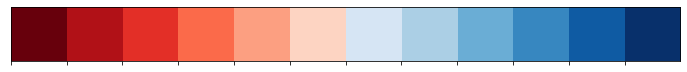

In [12]:


colors_preto = ['#67000C', '#B11117', '#E32F27', '#FB6A4A', '#FC9F81', '#FDD4C2']
colors_branco = ['#D6E5F4','#ABCFE5','#6AADD5','#3787C0','#0F5BA3','#08306B']

palette = colors_preto + colors_branco
sns.palplot(palette)



In [34]:
import pandas as pd

In [ ]:
pd.array()

<AxesSubplot:ylabel='Frequency'>

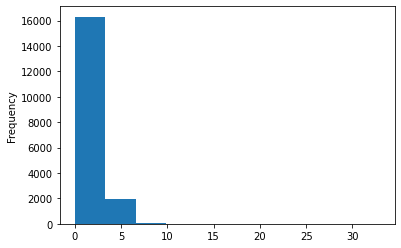

In [23]:
dd['v004'].plot(kind='hist')

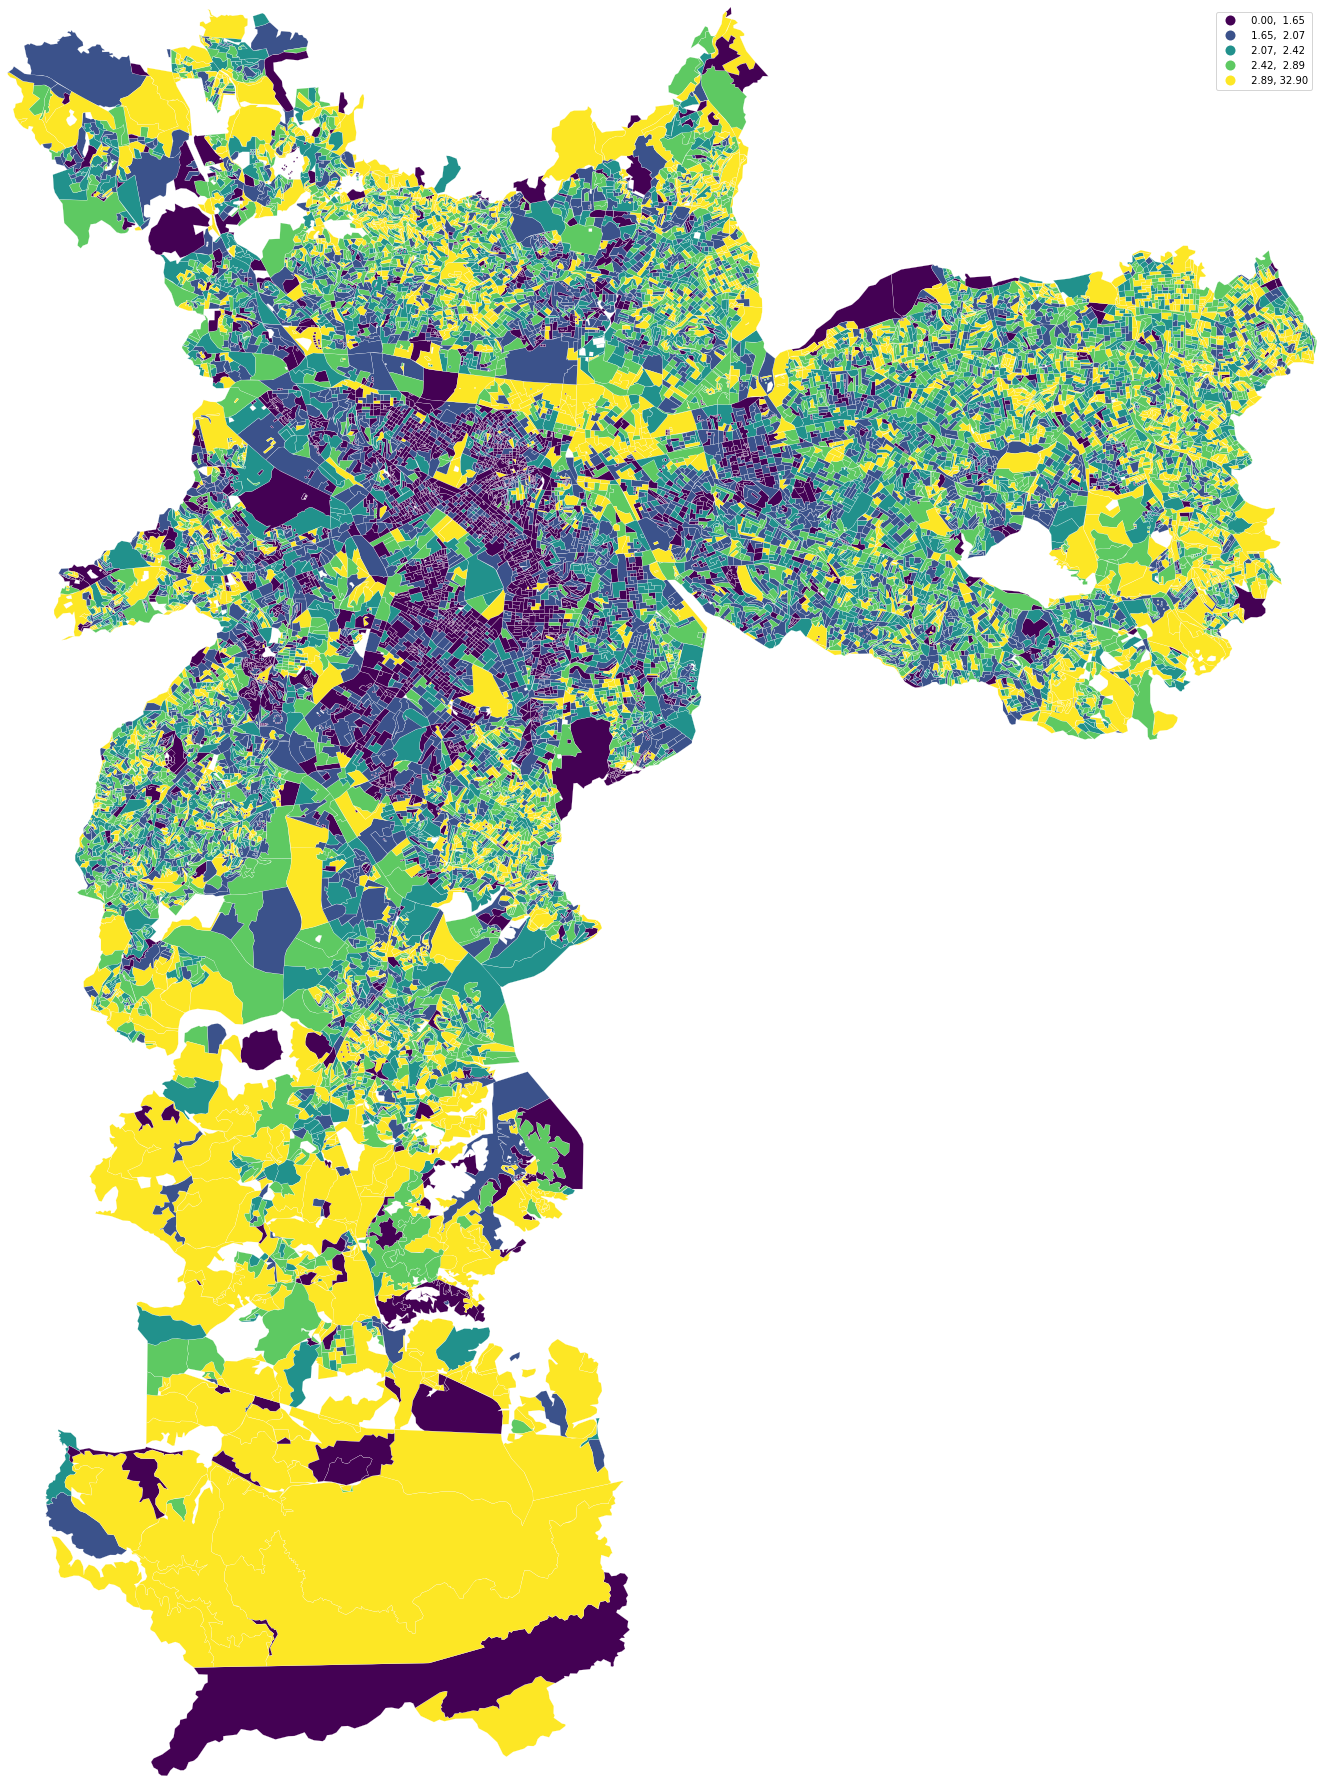

In [30]:
fig = plt.figure(figsize=(30,30 * 640/590))
ax = plt.subplot()

bins = [2,4,8,10]

cmap = ListedColormap(palette)

missing_kwds = {
        "color": "#d6d6d6",
        "edgecolor": "#FFFFFF",
        "label": "Sem dados",
    }

dd.plot(
    column=var,
            ax=ax,
            legend=True,
#             legend_kwds = legend_kwds,
#             cmap=cmap,
#             missing_kwds=missing_kwds,
#             scheme='user_defined', 
#             classification_kwds={'bins':bins},
    scheme = 'Quantiles',
            edgecolor='#FFFFFF',
            linewidth = 0.2
       )

ax.axis('off')
ax.margins(x=0, y=0)

plt.savefig(f'test_censo/sp.png', dpi=300, transparent=True, bbox_inches = 'tight', pad_inches = 0)

In [79]:
st = bd.Storage(dataset_id='br_ibge_censo_demografico',table_id='setor_censitario_basico_2010')

In [95]:
# Define a quick rename func
def rename(file_blob,new_name):
    bucket.rename_blob(file_blob, new_name)
    print(f'File {file_blob.name} \t changed to \t {new_name}')

In [84]:
table_blobs = list(
                st.client["storage_staging"]
                .bucket(f"{st.bucket_name}")
                .list_blobs(prefix=f"staging/{st.dataset_id}/{st.table_id}/")
            )

In [90]:
st.bucket_name

'basedosdados-dev'

In [103]:
for obj_blob in table_blobs:
    old_name = obj_blob.name
    if "SP1" in old_name or "SP2" in old_name:
        a = old_name
        new_name = old_name.replace('SP1','SP').replace('SP2','SP')
        print(new_name)

staging/br_ibge_censo_demografico/setor_censitario_basico_2010/sigla_uf=SP/basico.csv
staging/br_ibge_censo_demografico/setor_censitario_basico_2010/sigla_uf=SP/basico.csv


In [100]:
a.replace('SP2','SP')

'staging/br_ibge_censo_demografico/setor_censitario_basico_2010/sigla_uf=SP/basico.csv'

In [73]:
import re
from google.cloud import storage

# Grab the bucket
storage_clinet = storage.Client()
bucket = storage_clinet.bucket('dft-dst-prt-ais-raw-2016'​【𝟲𝟭𝟰 𝗺】)
files = bucket.list_blobs()

# Setup regexes
idenfity_file_missing_spaces = re.compile(r'ANSData_RawData\d+')
indentify_spacing = re.compile(r'(ANSData_RawData)(\d*)(\D*)(\d*)(ML\d*.dat)')


# Define a quick rename func
def rename(file_blob):
    new_name = ' '.join(indentify_spacing.findall(file_blob.name)[0])
    print(new_name)

    bucket.rename_blob(file_blob, new_name)

    print(f'File {file_blob.name} \t changed to \t {new_name}')


# Rename files only if they have a incorrect name
for file_b in files:
    if idenfity_file_missing_spaces.match(file_b.name):
        rename(file_b)


KeyboardInterrupt: 

In [64]:
import os
from pathlib import Path
import pandas as pd

def _creat_path_tree(savepath, filter_combination):
    current_path = str(savepath) + '/'
    for folder in filter_combination.keys():
        current_path += f"{folder}={filter_combination[folder]}/"
        if not os.path.isdir(current_path):
            os.mkdir(current_path)
    return Path(current_path)


def to_partitions(data, partition_columns, savepath):
    """Save data in to hive patitions schema, given a dataframe and a list of partition columns.
    Args:
        data (pandas.core.frame.DataFrame): Dataframe to be partitioned.
        partition_columns (list): List of columns to be used as partitions.
        savepath (str, pathlib.PosixPath): folder path to save the partitions
    
    Exemple:

        data = {
            "ano": [2020, 2021, 2020, 2021, 2020, 2021, 2021,2025],
            "mes": [1, 2, 3, 4, 5, 6, 6,9],
            "sigla_uf": ["SP", "SP", "RJ", "RJ", "PR", "PR", "PR","PR"],
            "dado": ["a", "b", "c", "d", "e", "f", "g",'h'],
        }

        to_partitions(
            data=pd.DataFrame(data),
            partition_columns=['ano','mes','sigla_uf'],
            savepath='partitions/'
        )
    """
    
    if isinstance(data, (pd.core.frame.DataFrame)):

        savepath = Path(savepath)

        unique_combinations = (
            data[partition_columns]
            .drop_duplicates(subset=partition_columns)
            .to_dict(orient="records")
        )

        for filter_combination in unique_combinations:
            
            filter_save_path = _creat_path_tree(savepath, filter_combination)

            df_filter = data.loc[
                df[filter_combination.keys()]
                .isin(filter_combination.values())
                .all(axis=1),
                :,
            ]
            df_filter = df_filter.drop(columns=partition_columns)


            df_filter.to_csv(filter_save_path / "data.csv", index=False)

    else:
        raise (BaseException("Data need to be a pandas DataFrame"))

In [66]:
data = {
    "ano": [2020, 2021, 2020, 2021, 2020, 2021, 2021,2025],
    "mes": [1, 2, 3, 4, 5, 6, 6,9],
    "sigla_uf": ["SP", "SP", "RJ", "RJ", "PR", "PR", "PR","PR"],
    "dado": ["asd", "asd", "asd", "asd", "asd", "asd", "kkk",'jjj'],
}

df = pd.DataFrame(data)

to_partitions('asdsadsa',
              partition_columns=['ano','sigla_uf','mes'],
              savepath='partitions/'
             )

BaseException: Data need to be a pandas DataFrame

In [56]:
filter_combination

NameError: name 'filter_combination' is not defined

In [7]:
# years = [i for i in range(2007,2020)]

# for year in years:
#     query = f"""
#     SELECT * 
#     FROM `basedosdados.br_me_caged.microdados_antigos` 
#     WHERE ano={year}
#     LIMIT 100
#     """

#     bd.download(
#         f'/Users/m/Downloads/{year}.csv',
#         query=query, 
#         billing_project_id='basedosdados-dev',
#         use_bqstorage_api=True
#     )

In [21]:
st = bd.Storage(dataset_id='br_me_caged', table_id='microdados_movimentacoes')

In [22]:
st.copy_table(source_bucket_name='basedosdados', destination_bucket_name='basedosdados-dev', mode='raw')

In [25]:
mode = 'raw'
f"{mode.upper()} BACKUP OLD DATA"

'RAW BACKUP OLD DATA'

In [28]:
from tabula import read_pdf
import camelot

In [29]:
# test - '480-487'
### full - '339-844'

dd = camelot.read_pdf('/Users/m/Downloads/Autuacoes-Setembro-2021.pdf', pages='1-2',kind='textedge',flavor='stream')

In [31]:
df = pd.DataFrame()

for i in range(len(dd)):
    df = pd.concat([df,dd[i].df], axis=0)
    
df = df.reset_index(drop=True)

In [32]:
df

,0,1,2,3
0,,,CETESB - Autuações Aplicadas 01/09/21 à 30/09/21 - Quantidade: 500,
1,Tipo,Empreendimento,Endereço,Valor
2,Enquadramento,,,
3,Advertência,2 W Artefatos De Cimento Eireli - Me,"Rua Aristides Dos Santos, 235 - Caçapava","0,00"
4,,"ARTIGO 80, § 1º DO DECRETO Nº 8468, DE 08 DE SETEMBRO DE 1976 E SUAS ALTERAÇÕES.",,
5,Advertência,A F Sobrinho Carvalho Ltda,"Avenida Marginal Luis Guapo, 1205 - José Bonifácio","0,00"
6,,"ARTIGO (S) 58, INCISO II, E 58-A, INCISO I E II DO REGULAMENTO DA LEI Nº 997, DE 31 DE MAIO DE 1976, APROVADO PELO DECRETO Nº 8468, DE 08 DE SETEMBRO DE 1976 E SUAS ALTERAÇÕES.",,
7,Advertência,A.d.d. Industria E Comercio Ltda. - Epp,"Rua Dezoito De Fevereiro, 524 - Embu Das Artes","0,00"
8,,"ARTIGOS 2º COMBINADO COM O 3º INCISO V, 26, 51, 52, 58 INCISO II E 58-A INCISOS I E II DO REGULAMENTO DA LEI ESTADUAL Nº 997, DE 31 DE MAIO DE 1976, APROVADO PELO DECRETO ESTADUAL Nº 8468, DE 08 D...",,
9,SUAS ALTERAÇÕES.,,,


In [2]:
%%time
query = "SELECT * FROM basedosdados-dev.br_me_siconfi.municipio_despesas_funcao_check_layer_2_3"
df = bd.read_sql(query, billing_project_id='gabinete-sv')

Downloading:   3%|▋                        | 76944/2963413 [00:07<04:53, 9834.92rows/s]

KeyboardInterrupt: 

Downloading:   3%|▋                        | 76944/2963413 [00:19<04:53, 9834.92rows/s]

## FACEBOOK & INSTAGRAM MONITOR

- monitorar seguidores / comentarios / curtidas / engajamento / impressoes de figuras publicas
 
----

### Refs

- [Features Reference](https://developers.facebook.com/docs/features-reference#reference-PAGES_ACCESS)
- [Page Public Content Access](https://developers.facebook.com/docs/features-reference/page-public-content-access)
- [Page Public Metadata Access](https://developers.facebook.com/docs/features-reference/page-public-metadata-access)
- https://stackoverflow.com/questions/55176179/facebook-graph-api-to-get-public-post-of-the-public-page
- [public content access facebook stackoverflow](https://www.google.com/search?q=public+content+access+facebook+stackoverflow+site:stackoverflow.com&client=firefox-b-1-d&channel=nus5&biw=1848&bih=1003&tbs=qdr:y&sxsrf=AOaemvKsHtQsMuGCD1hu4TdgPY65sx53cg:1632756352736&sa=X&ved=2ahUKEwiZ2KKzu5_zAhUsq5UCHS1sBywQrQIoBHoECAgQBQ)


### TOOLS

- [instaloader](https://instaloader.github.io/as-module.html)
- [python-facebook-api](https://pypi.org/project/python-facebook-api/)
- [python-facebook](https://github.com/sns-sdks/python-facebook)

In [18]:
import instaloader
L = instaloader.Instaloader()
user = "anitta"
profile = instaloader.Profile.from_username(L.context, user)
profile.followers

55853700

## TESTA METADATA

In [3]:
import basedosdados as bd

tb = bd.Table(dataset_id='test_dataset',table_id='test_table')
# md = bd.Metadata('test_dataset','test_table')

st = bd.Storage(dataset_id='test_dataset',table_id='test_table')
st.delete_table()

In [4]:
table = tb.create(path='../test_data',
          if_table_exists='replace',
          if_storage_data_exists='replace',
          if_table_config_exists='replace'
         )

Uploading files: 100%|████████████████████████████| 2/2 [00:01<00:00,  1.58it/s]


In [3]:
tb.update_columns('https://docs.google.com/spreadsheets/d/1ihyOCSkaarmR3uMHj8bmP9tv-OChVeL2LkEWaGqxp7w/edit#gid=787251136')
